In [2]:
#3주차 KNN, 선형회귀,릿지회귀.라쏘회귀,로지스틱회귀 코딩연습
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

#한국어 출력을 위한 font 경로 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

Text(0, 0.5, 'target')

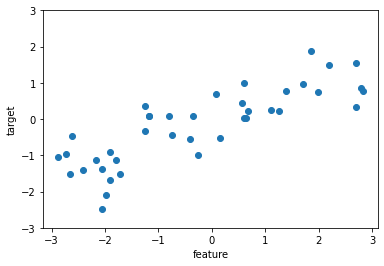

In [2]:
#make_wave 를 이용해 sample 40개 생성
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('feature')
plt.ylabel('target')

In [3]:
#knn 선형회귀 분석을 위한 임포트
from sklearn.neighbors import KNeighborsRegressor

#wave 데이터셋을 각각 훈련,테스트 셋으로 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#이웃 수를 3으로 하여 모델 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)
#훈련 데이터,타깃을 이용하여 모델을 학습시킨다.
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print('\n')
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


테스트 세트 R^2: 0.83


In [5]:
#이웃수를 7로 변경하여 모델객체생성
reg = KNeighborsRegressor(n_neighbors=7)
#훈련 데이터,타깃을 이용하여 모델을 학습시킨다.
reg.fit(X_train,y_train)

#이웃 수를 다르게 하여 모델을 설정하면 예측값과 결정계수의 값이 달라지는 것을 확인하였다.
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print('\n')
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 예측:
[-0.45154299  0.24645302  0.98933747 -1.63125367 -1.53884951 -1.63125367
  0.24645302  1.09165292 -0.13966928 -1.53884951]


테스트 세트 R^2: 0.68


In [9]:
#훈련과 테스트의 비율 65:35로 다르게 하여 결과값 확인
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.35)

#이웃 수를 3으로 하여 모델 객체 생성
reg = KNeighborsRegressor(n_neighbors=7)
#훈련 데이터,타깃을 이용하여 모델을 학습시킨다.
reg.fit(X_train,y_train)

#비율을 다르게 하니 결정계수의 값이 달라지는 것을 확인할 수 있었다.
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print('\n')
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 예측:
[-0.45154299  0.00585771  0.66227103 -1.4968375  -1.49878188 -1.47780849
  0.00585771  0.78136448 -0.2273122  -1.49878188 -0.11388266  0.78136448
 -1.49878188  0.54327022]


테스트 세트 R^2: 0.72


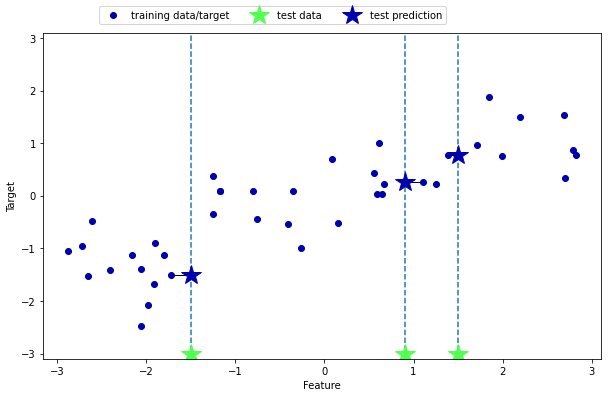

In [6]:
#이웃수를 다르게 하여 그래프에 표시.
mglearn.plots.plot_knn_regression(n_neighbors=1)

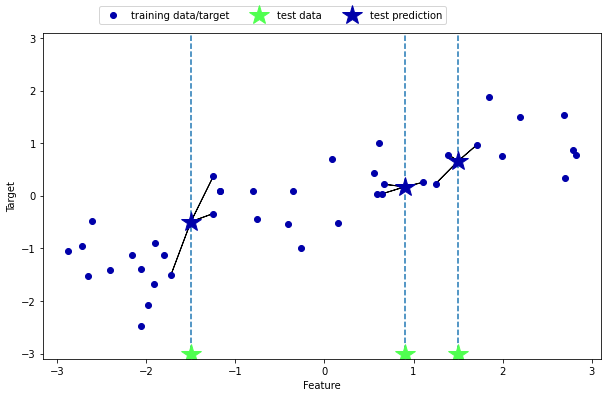

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

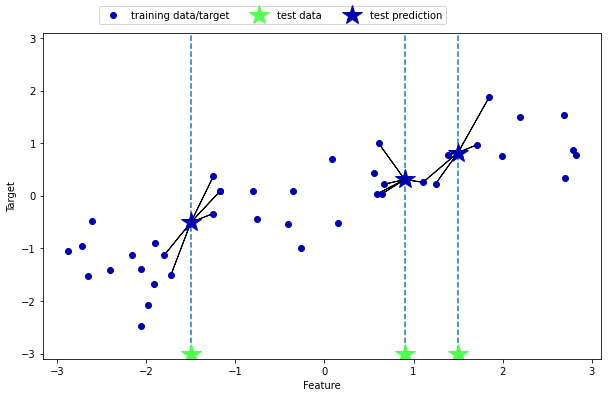

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

X_train.shape: (26, 1) X_test.shape:(14, 1)
X_train.shape: (26, 1) X_test.shape:(14, 1)
X_train.shape: (26, 1) X_test.shape:(14, 1)


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


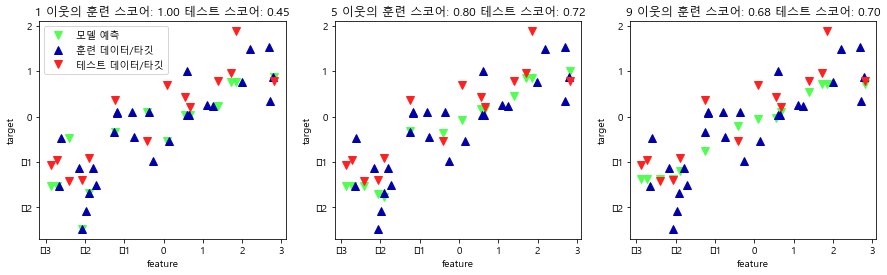

In [19]:
#샘플수 40개인 KNN의 회귀분석 그래프 표현하기
fig, axes = plt.subplots(1,3, figsize=(15,4))
for n_neighbors, ax in zip([1,5,9], axes):
    #1,5,9 이웃을 사용한 예측
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    print("X_train.shape: {}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))
    reg.fit(X_train,y_train)
    # v 는 아랫방향 삼각형 ^는 윗방향삼각형 마커 이용 
    ax.plot(X_test,reg.predict(X_test),'v',c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['모델 예측',"훈련 데이터/타깃", "테스트 데이터/타깃"], loc='best')

In [20]:
#평균제곱근오차 구하기

#기울기 a와 y절편 b
ab = [3,76]

#x,y의 데이터값
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#y = ax+b에 a와 b값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0]*x + ab[1]

#RMSE(평균제곱근오차) 함수
def rmse(p,a):
    return np.sqrt(((p-a)**2).mean())

#RMSE함수를 각y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result),np.array(y))

#예측값이 들어갈 빈 리스트
predict_result=[]

#모든 x값을 한번씩 대입
for i in range(len(x)):
    #predict_result 리스트 완성하기
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" %(x[i],y[i],predict(x[i])))

#최종 RMSE 출력하기
print("rmse 최종값 : "+str(rmse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값 : 3.3166247903554


In [22]:
#선형회귀 학습하기

from sklearn.linear_model import LinearRegression
#sample 수 70개로 해서 데이터 생성
X,y = mglearn.datasets.make_wave(n_samples=70)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#선형회귀 모델 생성
lr = LinearRegression().fit(X_train,y_train)

#선형회귀의 점수 확인하기
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print('\n')
#가중치와 절편으로 나타내기
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

훈련 세트 점수: 0.66
테스트 세트 점수: 0.62


lr.coef_: [0.36690205]
lr.intercept_: 0.047418673120170146


In [23]:
plt.figure(figsize=(8, 8))
plt.plot(line, lr.predict(line))
plt.plot(X_train, y_train, 'o', c=mglearn.cm2(0))
plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
# KNN 결과 출력
#1차원 특징이라서 정확률이 낮다.샘플수가 커질수록 데이터의 분포가 퍼져서 정확률이낮다. 
plt.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
#ax.set_xlabel("Feature") #ax.set_ylabel("Target")
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc="best")
ax.grid(True)
ax.set_aspect('equal')

NameError: name 'line' is not defined

<Figure size 576x576 with 0 Axes>

In [4]:
#보스턴 주택가격 데이터를 이용해 적용시켜보기

from sklearn.datasets import load_boston
boston = load_boston()

print("boston.keys():{}\n".format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성 이름:\n{}\n".format(boston.feature_names))

#보스턴 데이터를 이용해 보기 편하게 dataframe으로 생성
df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys():dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성 이름:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


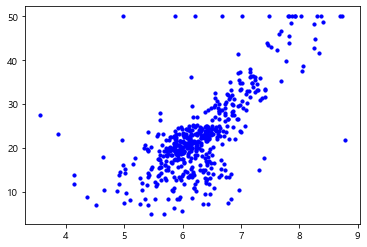

In [27]:
#보스턴 주택가격 특성중 방의 개수와 가격의 상관관계 산점도로 나타내기
plt.scatter(boston.data[:,5], boston.target, color='b', s=10)

In [28]:
# 특징 하나로만 선형회귀실험
#특징 'RM'
X = boston.data[:,5]

print(X.shape)

#LinearRegression의 함수에 인자로 전달하기 위해서는
#각 원소의 값이 담긴 2차원 배열을 (n,1) 형태로 만들 필요가 있다.
#atleast_2d 함수는 x데이터를 2차원 배열을(1,n)형태로 만들어 준다.

X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1) #transpose 는 전치 함수
print(X_2.shape)
y = boston.target

lr.fit(X_2,y)

y_predicted = lr.predict(X_2)

print("w[0]: %f b: %f" %(lr.coef_[0], lr.intercept_))

(506,)
(506, 1)
w[0]: 9.102109 b: -34.670621


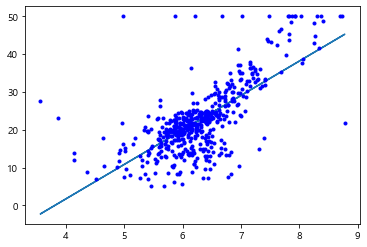

In [29]:
#선형회귀 모델 그리기
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='b', markersize=3)

(506,)
(506, 1)
w[0]: -0.123163 b: 30.978678


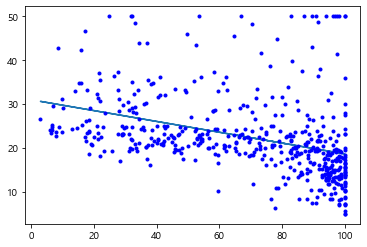

In [30]:
#  다른 특징 하나로만 선형회귀실험
#특징 'AGE'
#특징에 따라 선형회귀 결과가 달라지는 사실을 확인할 수 있다.
X = boston.data[:,6]

print(X.shape)

#LinearRegression의 함수에 인자로 전달하기 위해서는
#각 원소의 값이 담긴 2차원 배열을 (n,1) 형태로 만들 필요가 있다.
#atleast_2d 함수는 x데이터를 2차원 배열을(1,n)형태로 만들어 준다.

X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1) #transpose 는 전치 함수
print(X_2.shape)
y = boston.target

lr.fit(X_2,y)

y_predicted = lr.predict(X_2)

print("w[0]: %f b: %f" %(lr.coef_[0], lr.intercept_))

#선형회귀 모델 그리기
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='b', markersize=3)

In [31]:
#선형회귀 모델 성능확인
X_train,X_test,y_train,y_test = train_test_split(boston.data, boston.target, random_state = 42)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))
lr = LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print("\n")

#같은 모델 KNN 으로 성능비교
#k =5 이다.
X_train,X_test,y_train,y_test = train_test_split(boston.data, boston.target, random_state = 42)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))
lr = KNeighborsRegressor().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X_train.shape: (379, 13) X_test.shape:(127, 13)
훈련 세트 점수: 0.75
테스트 세트 점수: 0.68


X_train.shape: (379, 13) X_test.shape:(127, 13)
훈련 세트 점수: 0.67
테스트 세트 점수: 0.64


In [6]:
#보스톤 확장 데이터

X,y = mglearn.datasets.load_extended_boston()

print("X.shape: {}".format(X.shape))

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 42)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape), '\n')
lr = LinearRegression().fit(X_train,y_train)
print('선형 회귀 모델')
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print("\n")

#같은 모델 KNN 으로 성능비교
#k =5 이다.
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print('knn(n=5)모델')
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))
print('\n')
#k=7이다.
knn = KNeighborsRegressor(n_neighbors=7).fit(X_train,y_train)
print('knn(n=7)모델')
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

X.shape: (506, 104)
X_train.shape: (379, 104) X_test.shape:(127, 104) 

선형 회귀 모델
훈련 세트 점수: 0.94
테스트 세트 점수: 0.78


knn(n=5)모델
훈련 세트 점수: 0.84
테스트 세트 점수: 0.70


knn(n=7)모델
훈련 세트 점수: 0.77
테스트 세트 점수: 0.68


In [8]:
#릿지 회귀(선형회귀와 다르게 패널티를 부여하여 가중치의 값을 제어한다.)
#패널티가 심해지면 일반화가 심하게 되어 과소적합이 될 수있고, 패널티가 적어지면
#과대적합이 될 가능성이 있으니 적절한 값을 주는 것이 중요하다.

#보스톤 확장 데이터를 이용해 각각 성능 비교
#릿지회귀
from sklearn.linear_model import Ridge

print("릿지 모델 default='1.0'")
ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)),'\n')

#선형회귀
lr = LinearRegression().fit(X_train,y_train)
print('선형 회귀 모델')
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print("\n")

#같은 모델 KNN 으로 성능비교
#k =5 이다.
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print('knn(n=5)모델')
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

릿지 모델 default='1.0'
훈련 세트 점수: 0.87
테스트 세트 점수: 0.81 

선형 회귀 모델
훈련 세트 점수: 0.94
테스트 세트 점수: 0.78


knn(n=5)모델
훈련 세트 점수: 0.84
테스트 세트 점수: 0.70


In [10]:
#릿지 값에 따른 점수 차이 비교

#규제 강화
ridge100 = Ridge(alpha=100).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge100.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge100.score(X_test,y_test)),'\n')

#규제 완화
ridge001 = Ridge(alpha=0.01).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge001.score(X_test,y_test)))

훈련 세트 점수: 0.56
테스트 세트 점수: 0.55 

훈련 세트 점수: 0.94
테스트 세트 점수: 0.81


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


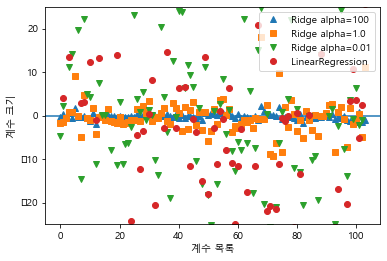

In [12]:
#알파값에 따라서 분포도가 달라지는 것을 확인할 수 있다.
#알파값이 커질수록 일반화가 많이 된다는 사실을 확인할 수 있다.
#알파 값이 작아질수록 선형회귀와 비슷해진다는 사실을 확인할 수 있다.
plt.plot(ridge100.coef_, '^',label="Ridge alpha=100")
plt.plot(ridge.coef_, 's',label="Ridge alpha=1.0")
plt.plot(ridge001.coef_, 'v',label="Ridge alpha=0.01")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel('계수 목록')
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

In [14]:
#좀 더 다양한 알파값에 따른 릿지회귀의 성능 비교
ridge1000 = Ridge(alpha=1000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge1000.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge1000.score(X_test,y_test)),'\n')

ridge100 = Ridge(alpha=100).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge100.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge100.score(X_test,y_test)),'\n')

ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)),'\n')

ridge5 = Ridge(alpha=5).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge5.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge5.score(X_test,y_test)),'\n')

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)),'\n')

ridge001 = Ridge(alpha=0.01).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge001.score(X_test,y_test)),'\n')

ridge0001 = Ridge(alpha=0.001).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge0001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge0001.score(X_test,y_test)))

훈련 세트 점수: 0.25
테스트 세트 점수: 0.26 

훈련 세트 점수: 0.56
테스트 세트 점수: 0.55 

훈련 세트 점수: 0.77
테스트 세트 점수: 0.73 

훈련 세트 점수: 0.80
테스트 세트 점수: 0.76 

훈련 세트 점수: 0.92
테스트 세트 점수: 0.82 

훈련 세트 점수: 0.94
테스트 세트 점수: 0.81 

훈련 세트 점수: 0.94
테스트 세트 점수: 0.81


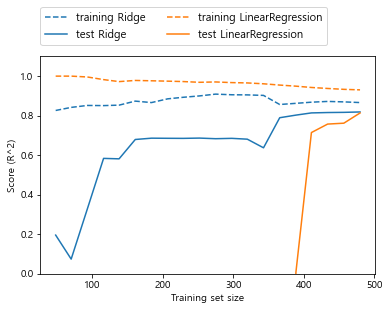

In [15]:
#릿지 회귀의 샘플수 에 따른 학습곡선
#데이터가 많아지면 규제가 완화되어 선형회귀와 비슷해진다.
#선형회귀도 데이터가 많아지면 성능이 올라간다는 말과도 같다.
mglearn.plots.plot_ridge_n_samples()

In [16]:
#라쏘 회귀(보스턴 확장데이터 이용)
#알파값에 따라서 사용되어지는 특성의 개수가 달라진다.
#일부 특성을 특정잡아서 사용할떄 유용

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
#가중치가 0이 아닌 특성들만 더해서 사용된 특성 개수 파악
print("사용한 특성 개수 :{}".format(np.sum(lasso.coef_ !=0)))

훈련 세트 점수: 0.27
테스트 세트 점수: 0.26
사용한 특성 개수 :3


In [18]:
#max_iter 값을 설정해주지 않으면 값을 늘리라고 오류가발생하므로 주의!
#alpha 값을 완화해주면 복잡도가 증가하며 사용되는 특성의 수가 많아진다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성 개수 :{}".format(np.sum(lasso001.coef_ !=0)),'\n')

#alpha 값을 아주 작게하면 선형회귀모델과 비슷해진다.
lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso0001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso0001.score(X_test,y_test)))
print("사용한 특성 개수 :{}".format(np.sum(lasso0001.coef_ !=0)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.80
사용한 특성 개수 :34 

훈련 세트 점수: 0.93
테스트 세트 점수: 0.82
사용한 특성 개수 :73


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


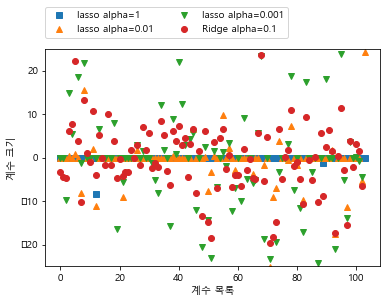

In [21]:
#알파값에 따라서 계수값이 많이 달라지는 것을 확인할 수 있다.
#알파값이 커질수록 대부분이 0이 되거나, 크기가 작아진다.
#알파 값이 작아질수록 값이 커지고 규제를 덜 받는다는 것을 볼수 있다.
plt.plot(lasso.coef_, 's',label="lasso alpha=1")
plt.plot(lasso001.coef_, '^',label="lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v',label="lasso alpha=0.001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.xlabel('계수 목록')
plt.ylabel("계수 크기")
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0,1.05))

In [25]:
#로지스틱 회귀 분류를 적용시켜 보기 위한 iris 붓꽃 데이터셋 임포트하기
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름:{}".format(iris['target_names']))
print('특성의 이름:{}'.format(iris['feature_names']))
X = iris["data"][:,3:] #petal width
print(X.shape)
y = (iris["target"]==2).astype(np.int) #'virginica' 면1  아니면 0
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름:['setosa' 'versicolor' 'virginica']
특성의 이름:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


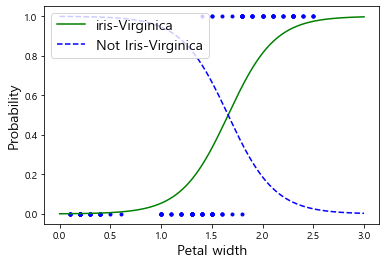

array([1, 0, 0, 0, 1])

In [30]:
#로지스틱 회귀의 페널티 디폴트 값은 L2 규제이다.
log_reg = LogisticRegression()
log_reg.fit(X,y)

#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정확률
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1], "g-", label='iris-Virginica')
plt.plot(X_new,y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()

log_reg.predict([[1.8],[1.2],[0.5],[1.6],[2.3]])

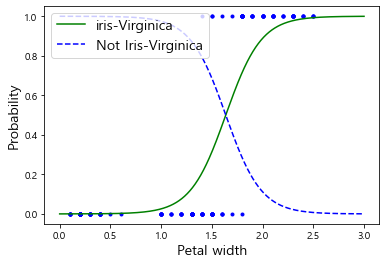

array([1, 0, 0, 0, 1])

In [31]:
#로지스틱 회귀의 페널티 L1 규제로 실험.
log_reg = LogisticRegression(solver="liblinear",penalty='l1')
log_reg.fit(X,y)

#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정확률
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1], "g-", label='iris-Virginica')
plt.plot(X_new,y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()

log_reg.predict([[1.8],[1.2],[0.5],[1.6],[2.3]])

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<bound method Axes.legend of <AxesSubplot:title={'center':'LinearSVC'}, xlabel='특성0', ylabel='특성1'>>

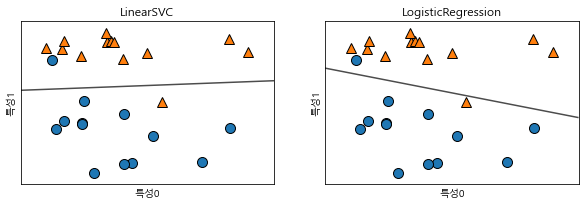

In [34]:
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend

In [36]:
#cancer data 분류
#여기서 패널티 값인 C는 역수로 계산해서 생각하여야 한다.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target, stratify=cancer.target, random_state=42)
#C 의 기본 디폴트 값은 1.0이다.
logreg = LogisticRegression(max_iter = 5000).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)),'\n')

#규제가 1000분의 1 배 되었기 때문에 규제가 완화된다.
#개개의 포인터에 맞춘다.
logreg1000 = LogisticRegression(C = 1000 , max_iter = 5000).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg1000.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg1000.score(X_test,y_test)),'\n')

# 패널티가 10배가 되기때문에 규제가 강화된다.
#계수가 0에 가까워지며 다수의 포인터에 맞춰진다.
logreg01 = LogisticRegression(C=0.1 ,max_iter = 5000).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg01.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg01.score(X_test,y_test)))


훈련 세트 점수: 0.958
테스트 세트 점수: 0.958 

훈련 세트 점수: 0.986
테스트 세트 점수: 0.986 

훈련 세트 점수: 0.951
테스트 세트 점수: 0.951


C=0.010 인 l2 로지스틱 회귀의 훈련 정확도: 0.95
C=0.010 인 l2 로지스틱 회귀의 테스트 정확도: 0.95
C=1.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l2 로지스틱 회귀의 테스트 정확도: 0.96
C=1000.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.99
C=1000.000 인 l2 로지스틱 회귀의 테스트 정확도: 0.99


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


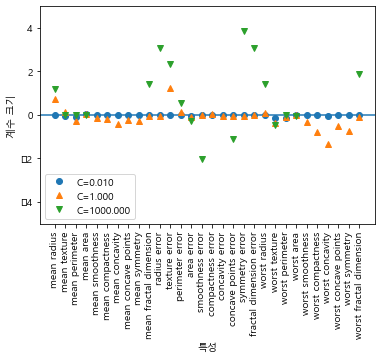

In [47]:
#L2 규제 값을 다르게 하여 유방암 데이터 성능 비교
for C, marker in zip([0.01,1,1000], ['o','^','v']):
    lr_l2 = LogisticRegression(C=C, max_iter=100000).fit(X_train,y_train)
    print("C={:.3f} 인 l2 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
        C,lr_l2.score(X_train,y_train)))
    print("C={:.3f} 인 l2 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
        C,lr_l2.score(X_test,y_test)))
    plt.plot(lr_l2.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

C=0.010 인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.010 인 l1 로지스틱 회귀의 테스트 정확도: 0.93
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=1000.000 인 l1 로지스틱 회귀의 훈련 정확도: 1.00
C=1000.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.94


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


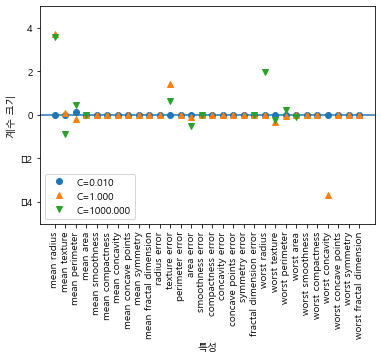

In [48]:
#L1 규제값을 다르게 하여 유방암 데이터 성능 비교
for C, marker in zip([0.01,1,1000], ['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=100000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
        C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
        C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)